## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape

(294478, 5)

In [5]:
df.user_id.nunique()

290584

In [6]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

c. The number of unique users in the dataset.

In [7]:
df.groupby('converted').count()

,user_id,timestamp,group,landing_page
converted,,,,
0,259241,259241,259241,259241
1,35237,35237,35237,35237


d. The proportion of users converted.

In [8]:
df.converted.mean()*100

11.965919355605511

In [9]:
df.query('(group == "treatment") != (landing_page == "new_page")').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

e. The number of times the `new_page` and `treatment` don't match.

In [10]:
df.query('(group == "treatment") != (landing_page == "new_page")')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [11]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")')

In [13]:
df2.shape

(290585, 5)

In [14]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2[df2['user_id'].duplicated() == True]['user_id'] 

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2.drop_duplicates('user_id',inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
df2.query('group == "control" and converted ==1')['converted'].count()/df2.query('group == "control"')['converted'].count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
df2.query('group == "treatment" and converted ==1')['converted'].count()/df2.query('group == "treatment"')['converted'].count()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [24]:
df2.query('landing_page == "new_page"')['converted'].count()/df2.shape[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**From the above Probability of individuals converted regardless of page they recive is .1195. The individuals in control group converted to new page is .1203 and treatment group is .1188. The individuals receive new page is .50. This shows no suffient eviidence that new page leads to more conversion**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


**H0: $p_{old}$ >= $p_{new}$      (or)   $p_{new}$ - $p_{old}$ <= 0**

**H1: $p_{old}$ < $p_{new}$       (or)   $p_{new}$ - $p_{old}$ > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [25]:
p_new = df2.query('converted == 1')['converted'].count()/df2.shape[0]
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old = df2.query('converted == 1')['converted'].count()/df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [27]:
n_new = df2.query('landing_page == "new_page"')['landing_page'].count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [28]:
n_old = df2.query('landing_page == "old_page"')['landing_page'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
# a= takes an array to draw a sample from (possible outcomes [0,1])
# size= shape of the output (len of n_new)
# p = probabilities associated witch each item from the array in 'a'
new_page_converted = np.random.choice(a = [0,1], size = n_new, p = (p_new,1-p_new))
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
old_page_converted = np.random.choice(a = [0,1], size = n_old, p = (p_old,1-p_old))
old_page_converted

array([0, 1, 1, ..., 1, 1, 1])

In [31]:
new_page_converted.mean()

0.87948523845571536

In [32]:
old_page_converted.mean()

0.88189214862948639

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
p_diffs = new_page_converted.mean() - old_page_converted.mean()
p_diffs

-0.0024069101737710374

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [34]:
# simulate 10000 draws 
# we can use the code from above and only need to append the diffs in mean to our empty list 'p_diffs' 
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice(a = [0,1], size = n_new, p = (p_new, 1-p_new))
    old_page_converted = np.random.choice(a = [0,1], size = n_old, p = (p_old, 1-p_old))
    
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [35]:
# transform the output to an array to plot it 
p_diffs = np.array(p_diffs)

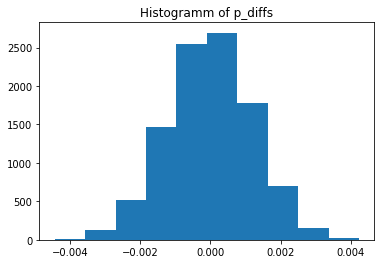

In [36]:
plt.hist(p_diffs);
plt.title('Histogramm of p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
# calculate the actual difference in the dataset to compare it with the estimated one
new_convert = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].count()
old_convert = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].count()

In [38]:
actual_cvt_new = (new_convert) / (n_new) 
actual_cvt_old = (old_convert) / (n_old)

In [39]:
act_diffs = actual_cvt_new - actual_cvt_old
act_diffs

-0.0015782389853555567

In [40]:
(p_diffs > act_diffs).mean() # get the p value

0.90680000000000005

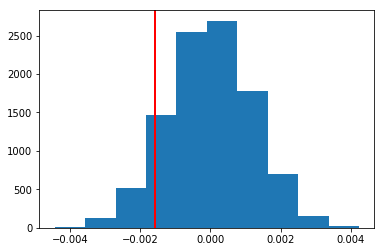

In [41]:
plt.hist(p_diffs);
plt.axvline(act_diffs, c= 'r', linewidth = 2);

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Computed the p value (.90). The p value is like a probability in which the null is true. In our case we have a high p-value (0.90) which means that we cannot reject the null and can keep the old page since the new page isn't better in ascpect of the conversion rate. Usually the null is rejected when the the p-value is below 0.05.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [42]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].count()
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].count()
n_new = df2.query('landing_page == "new_page"')['landing_page'].count()
n_old = df2.query('landing_page == "old_page"')['landing_page'].count()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [43]:
# convert to array
count = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])

In [44]:
# alternative larger: since H1 is Pold<Pnew
zstat, p_value = sm.stats.proportions_ztest(count, nobs, alternative = 'larger')

In [45]:

zstat, p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [46]:
# norm from scipy contains different functions that can be applied on normal distributed variables 
from scipy.stats import norm
norm.cdf(zstat) 
# https://stackoverflow.com/questions/3496656/convert-z-score-z-value-standard-score-to-p-value-for-normal-distribution-in

0.094941687240975514

In [47]:
norm.ppf(.95) # claculating the critical value for an error rate of 0.05 (to have 95% confidence)

1.6448536269514722

**Since the the z-score (0.0949) is less than the critcal value (1.6449), we failed to reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**The best suited approach for performing this case is logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [48]:
df['intercept'] = 1
df[['ab_page2', 'ab_page']] = pd.get_dummies(df['group'])
df = df.drop('ab_page2', axis = 1)
df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [49]:
log_mod = sm.Logit(df['converted'], df[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [56]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-12 13:01 AIC:              215704.9004
No. Observations:   294478           BIC:              215726.0864
Df Model:           1                Log-Likelihood:   -1.0785e+05
Df Residuals:       294476           LL-Null:          -1.0785e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9887    0.0080  -248.2967  0.0000  -2.0044  -1.9730
ab_page      -0.0140    0.0114    -1.2369  0.2161  -0.0363   0.0082
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**ab_page has a p-value of 0.216 which is lower than in part 2. As I unsderstand it, beforehand we used a one tailed test and now a two tailed test. A one tailed test means that our hypothesis are baised towards a 'side' (HO: old_page => new_page , H1: old_page < new_page), whereas a two tailed test looks for diffence in the outcome 'one both sides' on the distribution (H0: old_page = new_page; H1: old_page != new_page). Since a regession model uses a two tailed test, which sould therefore give us a different p-value since the calculation is different. But regradless of the change in p-value, we still fail to reject the null.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**In our connected world, things are rarely only connected to one predictor so it makes sense to include more than one predictor in a regression model to uncover relationships between variables. On the other side we should't add to many predictors because the chance that they correlate with each other gets higher with each added predictor (multicollinearity).**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [51]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df.set_index('user_id'), how='inner')

In [52]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [53]:
df_new.country.unique()

array(['US', 'UK', 'CA'], dtype=object)

In [54]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [57]:
# only include two of the three countries
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])
result = log_mod.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366241
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-12 13:02 AIC:              215705.8310
No. Observations:   294478           BIC:              215737.6099
Df Model:           2                Log-Likelihood:   -1.0785e+05
Df Residuals:       294475           LL-Null:          -1.0785e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0319    0.0258  -78.8446  0.0000  -2.0825  -1.9814
UK             0.0450    0.0282    1.5988  0.1099  -0.0102   0.1002
US             0.0357    0.0266    1.3401  0.1802  -0.0165   0.0879
==================================================================

"""

**The individual countries aren't statistical significant (p>0.05) for conversion rate, which means we failed to reject the null hypothesis.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [58]:
#creat interactions between page and country
df_new['page*CA'] = df_new['ab_page'] * df_new['CA']
df_new['page*UK'] = df_new['ab_page'] * df_new['UK']
df_new['page*US'] = df_new['ab_page'] * df_new['US']

In [59]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,page*CA,page*UK,page*US
user_id,,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0,1,0,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1,0,0,1


In [60]:
df_new.query('country == "US" and ab_page == "0"')

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,page*CA,page*UK,page*US
user_id,,,,,,,,,,,,,
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0,1,0,0,0
630008,US,2017-01-11 16:11:11.131461,control,old_page,0,1,0,0,0,1,0,0,0
630009,US,2017-01-05 23:35:15.820565,control,old_page,1,1,0,0,0,1,0,0,0
630011,US,2017-01-24 09:27:13.046891,control,old_page,0,1,0,0,0,1,0,0,0
630015,US,2017-01-07 07:42:23.111798,control,old_page,0,1,0,0,0,1,0,0,0
630020,US,2017-01-15 19:59:45.930099,control,old_page,0,1,0,0,0,1,0,0,0
630025,US,2017-01-18 11:40:49.024620,control,old_page,0,1,0,0,0,1,0,0,0
630029,US,2017-01-20 22:25:54.142640,control,old_page,0,1,0,0,0,1,0,0,0
630032,US,2017-01-20 09:48:46.727880,control,old_page,0,1,0,0,0,1,0,0,0


In [62]:
# again only include k-1 dummy variables 
log_mod1 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US', 'ab_page', 'page*UK', 'page*US']])
result1 = log_mod1.fit()
result1.summary2()

Optimization terminated successfully.
         Current function value: 0.366235
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-12 13:02 AIC:              215708.3190
No. Observations:   294478           BIC:              215771.8768
Df Model:           5                Log-Likelihood:   -1.0785e+05
Df Residuals:       294472           LL-Null:          -1.0785e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -1.9992    0.0361  -55.3724  0.0000  -2.0700  -1.9285
UK             0.0086    0.0395    0.2185  0.8270  -0.0688   0.0861
US             0.0120    0.0374    0.3222  0.7473  -0.0612   0.0852
ab_page       -0.0658    0.0516   -1.2767  0.2017  -0.1669   0.0352
page*UK        0.0732    0.0563    1.2997  0.1937  -0.0372   0.1836
page*US        0.0477    0.0533    0.8956  0.3705  -0.0567   0.1522
==================================================================

"""

**The interactions are also not statistical significant. Therefore the old and new page are equaly effective in terms of user conversion, regarding the hypothesis definition of a regression models two tailed testing.**

<a id='conclusions'></a>
## Conclusions

> The results from the computed logistic regression models and A/B test clearly shows that the new page ins't more effective in terms of user conversion in terms of page design and country origens. In my opinien the company should continue to use the old page, since it is familiar to the current users and generally people aren' pleased with change.

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0